In [135]:
import pandas as pd
import pandas_profiling
import numpy as np
from scipy import stats
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [150]:
pd.set_option('display.max_columns', 500)

In [151]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [152]:
#replace ? valus with 0
df = df.replace('?', 0)

In [153]:
#convert numerical datatypes to numeric
df = df.apply(pd.to_numeric)

ADDING COLUMNS TO DF

In [154]:
df['Smoke > 10 years'] = np.where(df['Smokes (years)'] > 10, 1, 0)
df['Been Pregnant'] = np.where(df['Num of pregnancies'] > 0, 1, 0)
df['Known First Sexual Intercourse Age'] = np.where(df['First sexual intercourse'] != 0, 1, 0)
df['> 1 STD'] = np.where(df['STDs (number)'] > 1, 1, 0)
df['>10 Years Sexual Activity'] = np.where(df['Age'] - df['First sexual intercourse'] >= 10, 1, 0)
df['IUD >= 5 Years'] = np.where(df['IUD (years)'] >= 5, 1, 0)
df['>= 3 Pregnancies'] = np.where(df['Num of pregnancies'] >= 3, 1, 0)
df['No Sexual Experience'] = np.where(df['Number of sexual partners'] == 0, 1, 0)

In [155]:
#drop time since columns due to lack of values
df = df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'STDs:AIDS'], axis = 1)

In [156]:
#check shape
df.shape

(858, 41)

In [157]:
#check imbalance
df['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

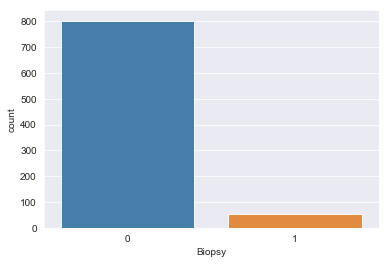

In [158]:
sns.set_style('darkgrid')
sns.countplot(df['Biopsy'], alpha=0.9)
#it is quite imbalanced

In [159]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Smoke > 10 years,Been Pregnant,Known First Sexual Intercourse Age,> 1 STD,>10 Years Sexual Activity,IUD >= 5 Years,>= 3 Pregnancies,No Sexual Experience
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,34,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0


In [160]:
cat_columns = ['Smokes', 
               'IUD', 
               'STDs',
               'STDs:condylomatosis',
               'STDs:cervical condylomatosis',
               'STDs:vaginal condylomatosis', 
               'STDs:vulvo-perineal condylomatosis',
               'STDs:syphilis',
               'STDs:pelvic inflammatory disease',
               'STDs:genital herpes',
               'STDs:molluscum contagiosum',
               'STDs:HIV',
               'STDs:Hepatitis B',
               'STDs:HPV',
               'Dx',
               'Dx:Cancer',
               'Dx:CIN',
               'Dx:HPV',
               'Hinselmann',
               'Schiller',
               'Citology',
               'Biopsy',
               'Smoke > 10 years',
               'Been Pregnant',
               'Known First Sexual Intercourse Age',
               '> 1 STD',
               '>10 Years Sexual Activity',
               'IUD >= 5 Years',
               '>= 3 Pregnancies',
               'No Sexual Experience']

In [161]:
#change columns to categories
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category'))

In [162]:
#verify that columns changed type to category
#df.info()

In [163]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.0,25.00,32.0,84.0
Number of sexual partners,858.0,2.451049,1.698528,0.0,1.0,2.00,3.0,28.0
First sexual intercourse,858.0,16.856643,3.183491,0.0,15.0,17.00,18.0,32.0
Num of pregnancies,858.0,2.127040,1.508108,0.0,1.0,2.00,3.0,11.0
Smokes (years),858.0,1.201241,4.060623,0.0,0.0,0.00,0.0,37.0
Smokes (packs/year),858.0,0.446278,2.210351,0.0,0.0,0.00,0.0,37.0
Hormonal Contraceptives,858.0,0.560606,0.496603,0.0,0.0,1.00,1.0,1.0
Hormonal Contraceptives (years),858.0,1.972394,3.597888,0.0,0.0,0.25,2.0,30.0
IUD (years),858.0,0.444604,1.814218,0.0,0.0,0.00,0.0,19.0
STDs (number),858.0,0.155012,0.529617,0.0,0.0,0.00,0.0,4.0


In [164]:
df.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis
Age,1.000000,0.087669,0.300110,0.491076,0.218261,0.131861,0.116499,0.298892,0.215427,-0.001330,-0.001606
Number of sexual partners,0.087669,1.000000,-0.117289,0.081464,0.172862,0.174271,0.029114,0.032282,0.014809,0.048008,0.057156
First sexual intercourse,0.300110,-0.117289,1.000000,-0.019291,-0.055023,-0.056013,0.053109,0.043469,-0.004363,0.027037,0.000911
Num of pregnancies,0.491076,0.081464,-0.019291,1.000000,0.164004,0.085327,0.150964,0.216538,0.143765,0.014761,0.042125
Smokes (years),0.218261,0.172862,-0.055023,0.164004,1.000000,0.724320,-0.000290,0.052436,0.038061,0.088605,0.078303
Smokes (packs/year),0.131861,0.174271,-0.056013,0.085327,0.724320,1.000000,0.014806,0.043803,0.016292,0.030247,0.029912
Hormonal Contraceptives,0.116499,0.029114,0.053109,0.150964,-0.000290,0.014806,1.000000,0.485621,0.009332,-0.011360,-0.023652
Hormonal Contraceptives (years),0.298892,0.032282,0.043469,0.216538,0.052436,0.043803,0.485621,1.000000,0.017955,0.002236,-0.025662
IUD (years),0.215427,0.014809,-0.004363,0.143765,0.038061,0.016292,0.009332,0.017955,1.000000,0.021286,0.012191
STDs (number),-0.001330,0.048008,0.027037,0.014761,0.088605,0.030247,-0.011360,0.002236,0.021286,1.000000,0.898446


In [165]:
#check for nulls
df.isnull().sum().sum()

0

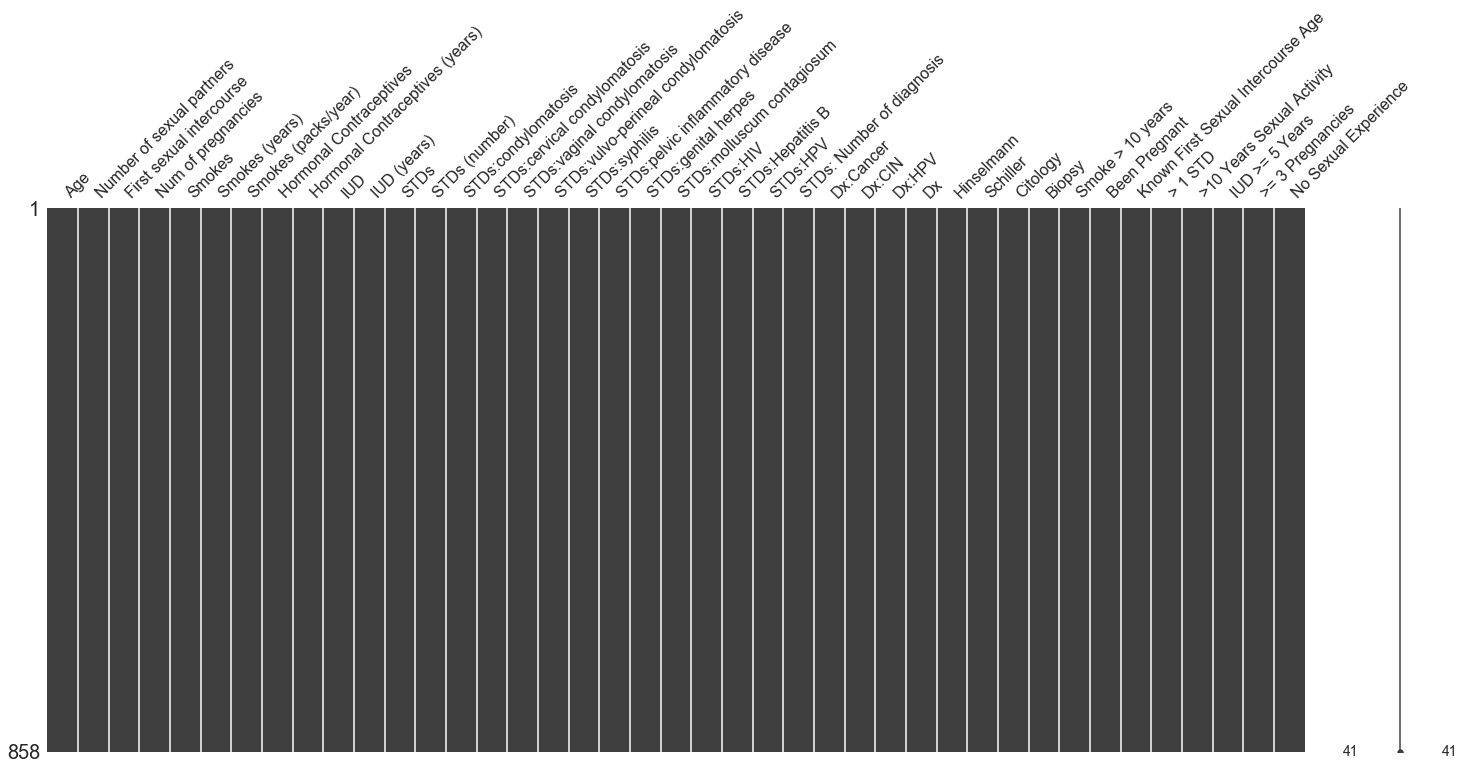

In [166]:
msno.matrix(df)

In [167]:
#reorder columns
columns_order = ['Age','Number of sexual partners', 'First sexual intercourse',
        'Known First Sexual Intercourse Age', 'No Sexual Experience', '>10 Years Sexual Activity',
       'Num of pregnancies', 'Been Pregnant', '>= 3 Pregnancies',
        'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
        'Smoke > 10 years', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'IUD >= 5 Years', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B',
       'STDs:HPV', 'STDs: Number of diagnosis', '> 1 STD', 'Dx:Cancer', 'Dx:CIN',
       'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy',]

In [168]:
#assign new order to df
df = df[columns_order]

In [169]:
#check df
df.head()

,Age,Number of sexual partners,First sexual intercourse,Known First Sexual Intercourse Age,No Sexual Experience,>10 Years Sexual Activity,Num of pregnancies,Been Pregnant,>= 3 Pregnancies,Smokes,Smokes (years),Smokes (packs/year),Smoke > 10 years,Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),IUD >= 5 Years,STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,> 1 STD,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1,0,0,1.0,1,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1,0,0,1.0,1,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
2,34,1.0,0.0,0,0,1,1.0,1,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,1,0,1,4.0,1,1,1.0,37.0,37.0,1,1.0,3.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,1,0,1,4.0,1,1,0.0,0.0,0.0,0,1.0,15.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0


In [170]:
#view all rows where Biopsy == 1
df.loc[df['Biopsy'] == 1]

,Age,Number of sexual partners,First sexual intercourse,Known First Sexual Intercourse Age,No Sexual Experience,>10 Years Sexual Activity,Num of pregnancies,Been Pregnant,>= 3 Pregnancies,Smokes,Smokes (years),Smokes (packs/year),Smoke > 10 years,Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),IUD >= 5 Years,STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,> 1 STD,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
6,51,3.0,17.0,1,0,1,6.0,1,1,1.0,34.000000,3.400000,1,0.0,0.00,1.0,7.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,0,1
22,40,1.0,18.0,1,0,1,1.0,1,0,0.0,0.000000,0.000000,0,1.0,0.25,0.0,0.0,0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,1,1,1
23,40,1.0,20.0,1,0,1,2.0,1,0,0.0,0.000000,0.000000,0,1.0,15.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,1,1,0,1
41,37,2.0,18.0,1,0,1,0.0,0,0,0.0,0.000000,0.000000,0,0.0,0.00,0.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1,0,1,0,1,0,1
44,37,3.0,19.0,1,0,1,3.0,1,1,1.0,12.000000,6.000000,1,1.0,13.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,1
64,38,2.0,15.0,1,0,1,4.0,1,1,0.0,0.000000,0.000000,0,1.0,16.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,1,0,1
93,33,1.0,29.0,1,0,0,2.0,1,0,0.0,0.000000,0.000000,0,1.0,0.50,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,1
96,35,5.0,11.0,1,0,1,0.0,0,0,1.0,15.000000,15.000000,1,1.0,14.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,1
103,38,3.0,18.0,1,0,1,4.0,1,1,0.0,0.000000,0.000000,0,1.0,10.00,1.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,1
131,30,0.0,13.0,1,1,1,3.0,1,1,1.0,22.000000,3.300000,1,0.0,0.00,0.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,1,1,0,1


In [171]:
#view all rows where Biopsy == 0
df.loc[df['Biopsy'] == 0]

,Age,Number of sexual partners,First sexual intercourse,Known First Sexual Intercourse Age,No Sexual Experience,>10 Years Sexual Activity,Num of pregnancies,Been Pregnant,>= 3 Pregnancies,Smokes,Smokes (years),Smokes (packs/year),Smoke > 10 years,Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),IUD >= 5 Years,STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,> 1 STD,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1,0,0,1.0,1,0,0.0,0.000000,0.000000,0,0.0,0.00,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1,0,0,1.0,1,0,0.0,0.000000,0.000000,0,0.0,0.00,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
2,34,1.0,0.0,0,0,1,1.0,1,0,0.0,0.000000,0.000000,0,0.0,0.00,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,1,0,1,4.0,1,1,1.0,37.000000,37.000000,1,1.0,3.00,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,1,0,1,4.0,1,1,0.0,0.000000,0.000000,0,1.0,15.00,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,1,0,1,2.0,1,0,0.0,0.000000,0.000000,0,0.0,0.00,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
7,26,1.0,26.0,1,0,0,3.0,1,1,0.0,0.000000,0.000000,0,1.0,2.00,1.0,7.00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,1,0,1,5.0,1,1,0.0,0.000000,0.000000,0,0.0,0.00,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,1,0,1,0.0,0,0,1.0,1.266973,2.800000,0,0.0,0.00,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
10,44,3.0,26.0,1,0,1,4.0,1,1,0.0,0.000000,0.000000,0,1.0,2.00,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0


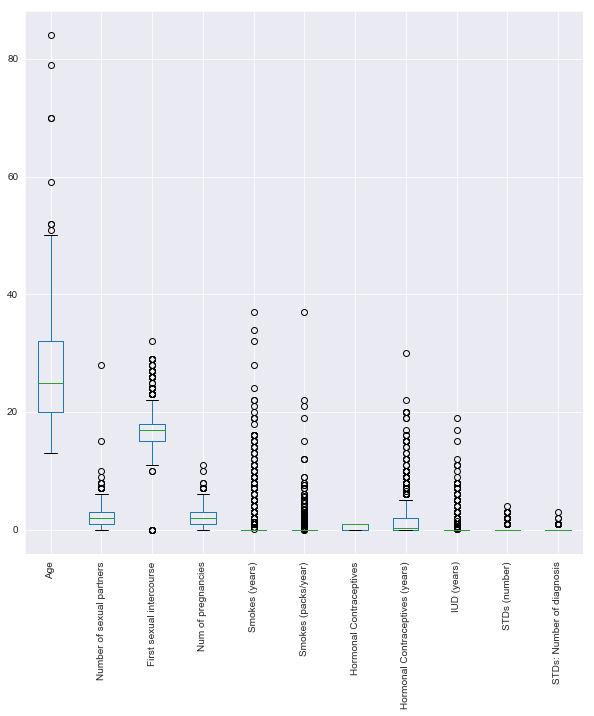

In [172]:
df.boxplot(figsize = (10,10), rot = 90)

In [173]:
# Sexual Partners summary
print('Sexual Partners Summary')

print('\n')
df.groupby(['Number of sexual partners','Biopsy'])['Number of sexual partners'].count().unstack()


Sexual Partners Summary




Biopsy,0,1
Number of sexual partners,,
0.0,25.0,1.0
1.0,193.0,13.0
2.0,255.0,17.0
3.0,195.0,13.0
4.0,72.0,6.0
5.0,40.0,4.0
6.0,8.0,1.0
7.0,7.0,NaN
8.0,4.0,NaN


In [174]:
# Age of first intercourse summary
print('Age of first intercourse Summary')

print('\n')
df.groupby(['First sexual intercourse','Biopsy'])['First sexual intercourse'].count().unstack()

Age of first intercourse Summary




Biopsy,0,1
First sexual intercourse,,
0.0,7.0,NaN
10.0,2.0,NaN
11.0,1.0,1.0
12.0,5.0,1.0
13.0,24.0,1.0
14.0,77.0,2.0
15.0,154.0,9.0
16.0,117.0,4.0
17.0,136.0,15.0


In [175]:
print('Smoking Summary')

print('\n')
df.groupby(['Smokes','Biopsy'])['Smokes'].count().unstack()

Smoking Summary




Biopsy,0,1
Smokes,,
0.0,690,45
1.0,113,10


In [176]:
#change categorical columns to dummy vars
df = pd.get_dummies(data=df, columns=cat_columns, drop_first = True)
        

In [180]:
print(df.shape)
df.head()

(858, 40)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,Smokes_1.0,IUD_1.0,STDs_1.0,STDs:condylomatosis_1.0,STDs:vaginal condylomatosis_1.0,STDs:vulvo-perineal condylomatosis_1.0,STDs:syphilis_1.0,STDs:pelvic inflammatory disease_1.0,STDs:genital herpes_1.0,STDs:molluscum contagiosum_1.0,STDs:HIV_1.0,STDs:Hepatitis B_1.0,STDs:HPV_1.0,Dx_1,Dx:Cancer_1,Dx:CIN_1,Dx:HPV_1,Hinselmann_1,Schiller_1,Citology_1,Biopsy_1,Smoke > 10 years_1,Been Pregnant_1,Known First Sexual Intercourse Age_1,> 1 STD_1,>10 Years Sexual Activity_1,IUD >= 5 Years_1,>= 3 Pregnancies_1,No Sexual Experience_1
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,34,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,52,5.0,16.0,4.0,37.0,37.0,1.0,3.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0


In [181]:
df.to_csv('cleaned_df.csv')